#**Load Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime
import math
from datetime import date

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, balanced_accuracy_score, roc_auc_score

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
def pipe(self, func, *args, **kwargs):
    return func(self, *args, **kwargs)

#**Load Data**

In [3]:
df = pd.read_csv("SBAnational.csv")
df.head() #target variable: MIS_Status

C:\Users\janar\AppData\Local\Temp\ipykernel_22484\4129675291.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("SBAnational.csv")


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.00,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.00,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.00,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.00,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.00,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [4]:
df.shape

(899164, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [6]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [7]:
TOTAL_MISS = df.isnull().sum()
PCT_MISS = round(100 * TOTAL_MISS / len(df.index), 2)
miss_value = pd.DataFrame(
    round(df.isnull().sum() * 100 / len(df.index), 2), columns=["percent_missing"]
)
miss_value_30 = PCT_MISS[PCT_MISS >= 30].index
miss_value.sort_values(["percent_missing"], ascending=False)

,percent_missing
ChgOffDate,81.91
RevLineCr,0.50
LowDoc,0.29
DisbursementDate,0.26
MIS_Status,0.22
Bank,0.17
BankState,0.17
NewExist,0.02
LoanNr_ChkDgt,0.00
FranchiseCode,0.00


In [8]:
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,899164.00,899164.00,899164.00,899164.00,899164.00,899028.00,899164.00,899164.00,899164.00,899164.00
mean,4772612310.59,53804.39,398660.95,110.77,11.41,1.28,8.43,10.80,2753.73,0.76
std,2538175037.45,31184.16,263318.31,78.86,74.11,0.45,236.69,237.12,12758.02,0.65
min,1000014003.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2589757508.50,27587.00,235210.00,60.00,2.00,1.00,0.00,0.00,1.00,0.00
50%,4361439006.00,55410.00,445310.00,84.00,4.00,1.00,0.00,1.00,1.00,1.00
75%,6904626504.75,83704.00,561730.00,120.00,10.00,2.00,1.00,4.00,1.00,1.00
max,9996003010.00,99999.00,928120.00,569.00,9999.00,2.00,8800.00,9500.00,99999.00,2.00


In [9]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [10]:
num_cols = df.select_dtypes(include=[np.number]).columns
num_cols

Index(['LoanNr_ChkDgt', 'Zip', 'NAICS', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural'],
      dtype='object')

In [11]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns
cat_cols

Index(['Name', 'City', 'State', 'Bank', 'BankState', 'ApprovalDate',
       'ApprovalFY', 'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv'],
      dtype='object')

#**Data Preprocessing**

In [12]:
#Remove the Name column since we already have LoanNr_ChkDgt to identify the business later
df = df.drop("Name", axis=1)

In [13]:
df.isnull().sum()

LoanNr_ChkDgt             0
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [14]:
date_cols = ['ApprovalDate', "ChgOffDate",'DisbursementDate']
df[date_cols] = df[date_cols].apply(pd.to_datetime)

In [15]:
df.head()

,LoanNr_ChkDgt,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2.00,0,0,1,0,N,Y,NaT,1999-02-28,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2.00,0,0,1,0,N,Y,NaT,1997-05-31,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1.00,0,0,1,0,N,N,NaT,1997-12-31,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,1.00,0,0,1,0,N,Y,NaT,1997-06-30,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,1.00,7,7,1,0,N,N,NaT,1997-05-14,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [16]:
# Clean the data and data type of columns with amount as values which are tagged as categorical column instead of numerical: 
# Disbursement Gross, Balance Gross, GrAppv, SBA_Appv
columns_to_clean = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
df[columns_to_clean] = df[columns_to_clean].apply(lambda x: x.str.strip().replace('[\$,]', '', regex=True).astype(float))

In [17]:
df.head()

,LoanNr_ChkDgt,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2.00,0,0,1,0,N,Y,NaT,1999-02-28,60000.00,0.00,P I F,0.00,60000.00,48000.00
1,1000024006,NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2.00,0,0,1,0,N,Y,NaT,1997-05-31,40000.00,0.00,P I F,0.00,40000.00,32000.00
2,1000034009,BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1.00,0,0,1,0,N,N,NaT,1997-12-31,287000.00,0.00,P I F,0.00,287000.00,215250.00
3,1000044001,BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,1.00,0,0,1,0,N,Y,NaT,1997-06-30,35000.00,0.00,P I F,0.00,35000.00,28000.00
4,1000054004,ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,1.00,7,7,1,0,N,N,NaT,1997-05-14,229000.00,0.00,P I F,0.00,229000.00,229000.00


In [18]:
df.isnull().sum()

LoanNr_ChkDgt             0
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [19]:
#Since the dataset is a US dataset, a package called uszipcode exists and thus we can fill the null values of City and State using this
!pip install uszipcode
import uszipcode
from uszipcode import SearchEngine
search = SearchEngine()

C:\Users\janar\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [20]:
cond = (df.City.isnull() | df.State.isnull())
missing = df[cond].index
major_city1 = {}
state1 = {}
for i in missing:
    zipcode = search.by_zipcode(df["Zip"][i])
    if zipcode is not None:
        major_city1[i] = zipcode.major_city
        state1[i] = zipcode.state
    else:
        major_city1[i] = np.nan
        state1[i] = np.nan

In [21]:
df["City"] = df.apply(lambda row: major_city1[row.name] if pd.isnull(row.City) else row.City, axis=1)

In [22]:
df["State"] = df.apply(lambda row: state1[row.name] if pd.isnull(row.State) else row.State, axis=1)

In [23]:
df.head()

,LoanNr_ChkDgt,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2.00,0,0,1,0,N,Y,NaT,1999-02-28,60000.00,0.00,P I F,0.00,60000.00,48000.00
1,1000024006,NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2.00,0,0,1,0,N,Y,NaT,1997-05-31,40000.00,0.00,P I F,0.00,40000.00,32000.00
2,1000034009,BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1.00,0,0,1,0,N,N,NaT,1997-12-31,287000.00,0.00,P I F,0.00,287000.00,215250.00
3,1000044001,BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,1.00,0,0,1,0,N,Y,NaT,1997-06-30,35000.00,0.00,P I F,0.00,35000.00,28000.00
4,1000054004,ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,1.00,7,7,1,0,N,N,NaT,1997-05-14,229000.00,0.00,P I F,0.00,229000.00,229000.00


In [24]:
df.isnull().sum()

LoanNr_ChkDgt             0
City                      2
State                     1
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [25]:
#Check if State of business origin is same with Bank State; if no, cannot copy the State value in Bank State
equal = 0
non_equal = 0
for i in df.index:
    if df.State[i] == df.BankState[i]:
        equal = equal + 1
    else:
        non_equal = non_equal +1
print(equal, non_equal)

473949 425215


In [26]:
#We can drop the Bank State and Bank Name columns
df = df.drop(["BankState", "Bank"], axis=1)

In [27]:
#There is a feature NewExist which means 1 = Existing Business and 2 = New Business
#There is also a feature 'RetainedJob' which is the number of jobs retained. 
#Assumption is that if loan retains some jobs it is an existing business.
df["RetainedJob"].unique()

array([   0,    7,   23,    4,    6,    1,    9,   20,    2,    5,   19,
          8,    3,   10,   24,   12,   15,   11,   25,   44,   17,   14,
         65,   28,   38,   16,   42,   26,   18,   13,   50,   93,   40,
         37,   60,   21,   30,   31,   34,   35,  150,   22,   73,   41,
         45,  100,  180,   58,   75,  165,   36,  130,   29,   27,  125,
         99,   46,   32,  257,   43,   47,   80,   70,   54,   62,   33,
         39,  400,   55,   95,   48,  120,   71,   63,   81,   52,   94,
         78,  160,  109,   86,   77,  155,   85,   90,   64, 3225,   61,
         69,   66,  210,  107,   97,   51,   83,  112,   53,   72,   76,
         87,   68,  118,  138,   67,   57,   56,  117,  171,  229,  115,
        275,  153,  300,  105,  140,  135,   59,   79,  200,  295,  205,
        206,  128,  186,  137,  250,   89,   49,  131,   92,  404,  110,
        320,  139,   82,  108,   88,  104,  114,  134,  230,  102,  103,
         96,   98,   84,  101,  220,  233,   74,  2

In [28]:
cond_1 = df[(df['NewExist'] == 0) & (df['RetainedJob'] >=1)].index
for i in cond_1:
    df.loc[i,['NewExist']] = 1

In [29]:
#Next we will do the same thing with another condition: NewExist = NA and Retained Job >=1
cond_2 = df[(df["NewExist"].isna()) & (df['RetainedJob'] >=1)].index
for i in cond_2:
    df.loc[i,['NewExist']] = 1

In [30]:
#Drop NewExist rows that are NA since no assumption can be made if it's still in operation or not
cond_3 = df[(df['NewExist'] == 0)].index
for i in cond_3:
    df.loc[i,['NewExist']] = np.nan
    
df = df.dropna(subset=['NewExist'])

In [31]:
df.isnull().sum()

LoanNr_ChkDgt             0
City                      2
State                     0
Zip                       0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4525
LowDoc                 2582
ChgOffDate           735637
DisbursementDate       2361
DisbursementGross         0
BalanceGross              0
MIS_Status             1991
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [32]:
#Check Franchise Code: 1 or 0 = No Franchise, other values = Franchise
df["FranchiseCode"].unique()

array([    1,     0, 15100, ...,  2899, 18701, 15930], dtype=int64)

In [33]:
#Change FranchiseCode to binary
df["FranchiseCode"] = df['FranchiseCode'].apply(lambda x: 0 if x <= 1 else 1)

In [34]:
df.isnull().sum()

LoanNr_ChkDgt             0
City                      2
State                     0
Zip                       0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4525
LowDoc                 2582
ChgOffDate           735637
DisbursementDate       2361
DisbursementGross         0
BalanceGross              0
MIS_Status             1991
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [35]:
#Check LowDoc which is a feature that pertains to LowDoc Loan program which allows loans under $150,000 to be processed
#using one page application. Y = one page application and N = more application pages, other values seen were mentioned as
#error in data entry
df["LowDoc"].value_counts(dropna=False)

N      782049
Y      110210
NaN      2582
0        1490
C         757
S         603
A         497
R          75
1           1
Name: LowDoc, dtype: int64

In [36]:
#Replace LoweDoc values and remove NAs
df["LowDoc"] = np.where(df["LowDoc"].isin(["C", "S", "A", "R", 1, 0]),np.nan,df["LowDoc"])
df['LowDoc'] = np.where((df['LowDoc'] == np.nan) & (df['DisbursementGross'] < 150000),"Y", df["LowDoc"])
df['LowDoc'] = np.where((df['LowDoc'] == np.nan) & (df['DisbursementGross'] >= 150000),"N",df["LowDoc"])

df = df[(df['LowDoc'] == "N") | (df['LowDoc'] == "Y")]
df["LowDoc"] = df["LowDoc"].apply(lambda x: 1 if x == "N" else 0)

In [37]:
df["LowDoc"].value_counts()

1    782049
0    110210
Name: LowDoc, dtype: int64

In [38]:
df.isnull().sum()

LoanNr_ChkDgt             0
City                      2
State                     0
Zip                       0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4273
LowDoc                    0
ChgOffDate           731246
DisbursementDate       2319
DisbursementGross         0
BalanceGross              0
MIS_Status             1983
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [39]:
#Check Approval FY
df['ApprovalFY'].apply(type).value_counts()

<class 'int'>    762921
<class 'str'>    129338
Name: ApprovalFY, dtype: int64

In [40]:
#Since the data types are different, check the unique values
df["ApprovalFY"].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, '2004', '1994',
       '1979', '1976', '1975', '1974', '1977', '1981', '1982', '1983',
       '1984', '1978', '1980', '1976A', '1969', '1995', '1970', '2005',
       '1996', '1971', 1996, 1971], dtype=object)

In [41]:
#Clean the ApprovalFY value with A
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x

df["ApprovalFY"] = df["ApprovalFY"].apply(clean_str).astype(int)

In [42]:
#Check Approval FY again
df['ApprovalFY'].apply(type).value_counts()

<class 'int'>    892259
Name: ApprovalFY, dtype: int64

In [43]:
#Change the NAICS code into its assigned Industry name
df['Industry'] = df['NAICS'].astype(str).str.strip().apply(lambda x: x[:2])

In [44]:
industry_dict = {'11': 'Agriculture_Forestry_Fishing_Hunting',
                 '21': 'Mining_Quarying_OilGas',
                 '22': 'Utilities',
                 '23': 'Construction',
                 '31': 'Manufacturing',
                 '32': 'Manufacturing',
                 '33': 'Manufacturing',
                 '42': 'Wholesale Trade',
                 '44': 'RetailTrade',
                 '45': 'RetailTrade',
                 '48': 'Transportation_Warehousing',
                 '49': 'Transportation_Warehousing',
                 '51': 'Information',
                 '52': 'Finance_Insurance',
                 '53': 'RealEstate_RentalLeasing',
                 '54': 'ProfessionalScientific_TechnicalService',
                 '55': 'ManagementOfCompanies_Enterprise',
                 '56': 'AdministrativeSupport_WasteManagement_RemediationService',
                 '61': 'Educational',
                 '62': 'HealthCare_SocialAssistance',
                 '71': 'Arts_Entertainment_Recreation',
                 '72': 'Accomodation_FoodService',
                 '81': 'OtherServieces_PublicAdministration',
                 '92': 'PublicAdministration'}

df['Industry'] = df['Industry'].map(industry_dict)

In [45]:
df.head()

,LoanNr_ChkDgt,City,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry
0,1000014003,EVANSVILLE,IN,47711,451120,1997-02-28,1997,84,4,2.00,0,0,0,0,N,0,NaT,1999-02-28,60000.00,0.00,P I F,0.00,60000.00,48000.00,RetailTrade
1,1000024006,NEW PARIS,IN,46526,722410,1997-02-28,1997,60,2,2.00,0,0,0,0,N,0,NaT,1997-05-31,40000.00,0.00,P I F,0.00,40000.00,32000.00,Accomodation_FoodService
2,1000034009,BLOOMINGTON,IN,47401,621210,1997-02-28,1997,180,7,1.00,0,0,0,0,N,1,NaT,1997-12-31,287000.00,0.00,P I F,0.00,287000.00,215250.00,HealthCare_SocialAssistance
3,1000044001,BROKEN ARROW,OK,74012,0,1997-02-28,1997,60,2,1.00,0,0,0,0,N,0,NaT,1997-06-30,35000.00,0.00,P I F,0.00,35000.00,28000.00,NaN
4,1000054004,ORLANDO,FL,32801,0,1997-02-28,1997,240,14,1.00,7,7,0,0,N,1,NaT,1997-05-14,229000.00,0.00,P I F,0.00,229000.00,229000.00,NaN


In [46]:
df.isnull().sum()

LoanNr_ChkDgt             0
City                      2
State                     0
Zip                       0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4273
LowDoc                    0
ChgOffDate           731246
DisbursementDate       2319
DisbursementGross         0
BalanceGross              0
MIS_Status             1983
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
Industry             200742
dtype: int64

In [47]:
#Get the industry default rate
def def_rate(i):
    sector_default = {"21":0.08, "11":0.09, "55":0.10, 
                      "62":0.10, "22":0.14, 
                      "92":0.15, "54":0.19, 
                      "42":0.19, "31":0.19,
                      "32":0.16, "33":0.14,
                      "81":0.20, "71":0.21,
                      "72":0.22, "44":0.22,
                      "45":0.23, "23":0.23,
                      "56":0.24, "61":0.24,
                      "51":0.25, "48":0.27,
                      "49":0.23, "52":0.28, "53":0.29}
    if i in sector_default:
        return sector_default[i]
    return np.nan

In [48]:
df['IndustryDefRate'] = df["NAICS"].astype(str).apply(lambda x: x[:2]).apply(def_rate)

In [49]:
df.head()

,LoanNr_ChkDgt,City,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry,IndustryDefRate
0,1000014003,EVANSVILLE,IN,47711,451120,1997-02-28,1997,84,4,2.00,0,0,0,0,N,0,NaT,1999-02-28,60000.00,0.00,P I F,0.00,60000.00,48000.00,RetailTrade,0.23
1,1000024006,NEW PARIS,IN,46526,722410,1997-02-28,1997,60,2,2.00,0,0,0,0,N,0,NaT,1997-05-31,40000.00,0.00,P I F,0.00,40000.00,32000.00,Accomodation_FoodService,0.22
2,1000034009,BLOOMINGTON,IN,47401,621210,1997-02-28,1997,180,7,1.00,0,0,0,0,N,1,NaT,1997-12-31,287000.00,0.00,P I F,0.00,287000.00,215250.00,HealthCare_SocialAssistance,0.10
3,1000044001,BROKEN ARROW,OK,74012,0,1997-02-28,1997,60,2,1.00,0,0,0,0,N,0,NaT,1997-06-30,35000.00,0.00,P I F,0.00,35000.00,28000.00,NaN,NaN
4,1000054004,ORLANDO,FL,32801,0,1997-02-28,1997,240,14,1.00,7,7,0,0,N,1,NaT,1997-05-14,229000.00,0.00,P I F,0.00,229000.00,229000.00,NaN,NaN


In [50]:
df.isnull().sum()

LoanNr_ChkDgt             0
City                      2
State                     0
Zip                       0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4273
LowDoc                    0
ChgOffDate           731246
DisbursementDate       2319
DisbursementGross         0
BalanceGross              0
MIS_Status             1983
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
Industry             200742
IndustryDefRate      200742
dtype: int64

In [51]:
#Change the value of MIS_Status 
#PIF means loan is paid (did not default) -> 1 (grant approval, low risk of default)
#CHGOFF means loan defaulted -> 0 (deny, high risk of default)
df["MIS_Status"] = df["MIS_Status"].apply(lambda x: 1 if x == 'P I F' else 0 if x == 'CHGOFF' else x)

In [52]:
#Clean MIS Status = NA with Charge Off Date =! NA; if Charge Off Date is also NA, drop the row in MIS Status
df['MIS_Status'] = np.where((df['ChgOffDate'] != np.nan) & (df['MIS_Status'] == np.nan),0,df["MIS_Status"])
df['MIS_Status'] = np.where((df['ChgOffDate'] == np.nan) & (df['MIS_Status'] != np.nan),1,df["MIS_Status"])
df['MIS_Status'] = np.where((df['MIS_Status'] == 0.0) & (df['ChgOffDate'] == np.nan),0,df["MIS_Status"])
df['MIS_Status'] = np.where((df['MIS_Status'] == 1.0) & (df['ChgOffDate'] != np.nan),1,df["MIS_Status"])

In [53]:
df["MIS_Status"].value_counts()

1.00    734356
0.00    155920
Name: MIS_Status, dtype: int64

In [54]:
df.isnull().sum()

LoanNr_ChkDgt             0
City                      2
State                     0
Zip                       0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4273
LowDoc                    0
ChgOffDate           731246
DisbursementDate       2319
DisbursementGross         0
BalanceGross              0
MIS_Status             1983
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
Industry             200742
IndustryDefRate      200742
dtype: int64

In [55]:
#Drop MIS Status rows that are still NA
df = df.dropna(subset=["MIS_Status"])

In [56]:
#Drop State and City rows that are still NA
df = df.dropna(subset=["City", "State"])

In [57]:
#Drop ChgOffDate after checking wth MIS Status since it has 80% missing values
#'ChgOffDate' corresponds to the date when a loan was declared to be in default. If NA, the loan is not default (means the loan was paid off)
df = df.drop("ChgOffDate", axis=1)

In [58]:
#Add new variable Real Estate: loans backed by real estate will have terms 20 years or greater (240 months) 
#and are the only loans granted for such a long term, whereas loans not backed by real estate will have terms less than 
#20 years (<240 months)
df['RealEstate'] = df['Term'].apply(lambda x: 1 if x >= 240 else 0)

In [59]:
df.head()

,LoanNr_ChkDgt,City,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry,IndustryDefRate,RealEstate
0,1000014003,EVANSVILLE,IN,47711,451120,1997-02-28,1997,84,4,2.00,0,0,0,0,N,0,1999-02-28,60000.00,0.00,1.00,0.00,60000.00,48000.00,RetailTrade,0.23,0
1,1000024006,NEW PARIS,IN,46526,722410,1997-02-28,1997,60,2,2.00,0,0,0,0,N,0,1997-05-31,40000.00,0.00,1.00,0.00,40000.00,32000.00,Accomodation_FoodService,0.22,0
2,1000034009,BLOOMINGTON,IN,47401,621210,1997-02-28,1997,180,7,1.00,0,0,0,0,N,1,1997-12-31,287000.00,0.00,1.00,0.00,287000.00,215250.00,HealthCare_SocialAssistance,0.10,0
3,1000044001,BROKEN ARROW,OK,74012,0,1997-02-28,1997,60,2,1.00,0,0,0,0,N,0,1997-06-30,35000.00,0.00,1.00,0.00,35000.00,28000.00,NaN,NaN,0
4,1000054004,ORLANDO,FL,32801,0,1997-02-28,1997,240,14,1.00,7,7,0,0,N,1,1997-05-14,229000.00,0.00,1.00,0.00,229000.00,229000.00,NaN,NaN,1


In [60]:
df.isnull().sum()

LoanNr_ChkDgt             0
City                      0
State                     0
Zip                       0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4265
LowDoc                    0
DisbursementDate       2133
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
Industry             200465
IndustryDefRate      200465
RealEstate                0
dtype: int64

In [61]:
#Add new variable: Recession
#Small business loans are affected by the economy in general, and more small business
#loans tend to default right before and during an economic
#recession
df['DaysTerm'] = df['Term']*30
df['Active'] = df['DisbursementDate'] + pd.TimedeltaIndex(df['DaysTerm'], unit='D')

startdate = datetime.datetime.strptime('2007-12-1', "%Y-%m-%d").date()
enddate = datetime.datetime.strptime('2009-06-30', "%Y-%m-%d").date()
df['Recession'] = df['Active'].apply(lambda x: 1 if startdate <= x <= enddate else 0)

C:\Users\janar\AppData\Local\Temp\ipykernel_22484\2916601772.py:10: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df['Recession'] = df['Active'].apply(lambda x: 1 if startdate <= x <= enddate else 0)
C:\Users\janar\AppData\Local\Temp\ipykernel_22484\2916601772.py:10: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable.
  df['Recession'] = df['Active'].apply(lambda x: 1 if startdate <= x <= enddate else 0)


In [62]:
df.head()

,LoanNr_ChkDgt,City,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry,IndustryDefRate,RealEstate,DaysTerm,Active,Recession
0,1000014003,EVANSVILLE,IN,47711,451120,1997-02-28,1997,84,4,2.00,0,0,0,0,N,0,1999-02-28,60000.00,0.00,1.00,0.00,60000.00,48000.00,RetailTrade,0.23,0,2520,2006-01-22,0
1,1000024006,NEW PARIS,IN,46526,722410,1997-02-28,1997,60,2,2.00,0,0,0,0,N,0,1997-05-31,40000.00,0.00,1.00,0.00,40000.00,32000.00,Accomodation_FoodService,0.22,0,1800,2002-05-05,0
2,1000034009,BLOOMINGTON,IN,47401,621210,1997-02-28,1997,180,7,1.00,0,0,0,0,N,1,1997-12-31,287000.00,0.00,1.00,0.00,287000.00,215250.00,HealthCare_SocialAssistance,0.10,0,5400,2012-10-13,0
3,1000044001,BROKEN ARROW,OK,74012,0,1997-02-28,1997,60,2,1.00,0,0,0,0,N,0,1997-06-30,35000.00,0.00,1.00,0.00,35000.00,28000.00,NaN,NaN,0,1800,2002-06-04,0
4,1000054004,ORLANDO,FL,32801,0,1997-02-28,1997,240,14,1.00,7,7,0,0,N,1,1997-05-14,229000.00,0.00,1.00,0.00,229000.00,229000.00,NaN,NaN,1,7200,2017-01-29,0


In [63]:
#Emphasis is placed on the default rates of loans with a disbursement date through 2010
#Account for variation due to the Great Recession (December 2007 to June 2009); so loans disbursed before, during, and after this time frame are needed.
#Restrict the time frame to loans by excluding those disbursed after 2010 due to the fact the term of a loan is frequently 5 or more years
df = df[df['DisbursementDate'] <= pd.Timestamp(2010, 12, 31)]

In [64]:
df.shape

(868914, 29)

In [65]:
#Drop the NAs for RevLineCr since it's also not safe to assume a business has a revolving line of credit or not
df = df.drop("RevLineCr", axis=1)

In [66]:
df.isnull().sum()

LoanNr_ChkDgt             0
City                      0
State                     0
Zip                       0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
LowDoc                    0
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
Industry             200100
IndustryDefRate      200100
RealEstate                0
DaysTerm                  0
Active                    0
Recession                 0
dtype: int64

In [67]:
df.loc[df["Industry"].isna()].head(20)

,LoanNr_ChkDgt,City,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry,IndustryDefRate,RealEstate,DaysTerm,Active,Recession
3,1000044001,BROKEN ARROW,OK,74012,0,1997-02-28,1997,60,2,1.00,0,0,0,0,0,1997-06-30,35000.00,0.00,1.00,0.00,35000.00,28000.00,NaN,NaN,0,1800,2002-06-04,0
4,1000054004,ORLANDO,FL,32801,0,1997-02-28,1997,240,14,1.00,7,7,0,0,1,1997-05-14,229000.00,0.00,1.00,0.00,229000.00,229000.00,NaN,NaN,1,7200,2017-01-29,0
6,1000093009,UNION,NJ,7083,0,1980-06-02,1980,45,45,2.00,0,0,0,0,1,1980-07-22,600000.00,0.00,0.00,208959.00,600000.00,499998.00,NaN,NaN,0,1350,1984-04-02,0
9,1000124001,GLASTONBURY,CT,6073,0,1997-02-28,1997,84,3,2.00,0,0,0,0,0,1997-04-30,70000.00,0.00,1.00,0.00,70000.00,56000.00,NaN,NaN,0,2520,2004-03-24,0
13,1000154010,SLATERSVILLE,RI,2876,0,1997-02-28,1997,120,2,2.00,0,0,0,0,1,1997-05-31,370000.00,0.00,1.00,0.00,370000.00,277500.00,NaN,NaN,0,3600,2007-04-09,0
14,1000214004,WINSTON-SALEM,NC,27106,0,1997-02-28,1997,240,1,1.00,30,0,0,0,1,1997-12-17,225000.00,0.00,1.00,0.00,225000.00,225000.00,NaN,NaN,1,7200,2017-09-03,0
16,1000254005,MIDLAND,TX,79701,0,1997-02-28,1997,60,5,1.00,0,0,0,0,0,1997-06-30,70000.00,0.00,1.00,0.00,70000.00,56000.00,NaN,NaN,0,1800,2002-06-04,0
17,1000264008,CENTREVILLE,VA,20120,0,1997-02-28,1997,60,16,1.00,0,0,0,0,0,1997-07-31,100000.00,0.00,1.00,0.00,100000.00,80000.00,NaN,NaN,0,1800,2002-07-05,0
18,1000284003,PLANO,TX,75093,0,1997-02-28,1997,84,12,2.00,0,0,1,0,0,1997-05-31,57500.00,0.00,1.00,0.00,57500.00,46000.00,NaN,NaN,0,2520,2004-04-24,0
19,1000294006,KNOXVILLE,TN,37922,0,1997-02-28,1997,120,4,2.00,0,0,0,0,0,1998-05-31,50000.00,0.00,1.00,0.00,50000.00,40000.00,NaN,NaN,0,3600,2008-04-08,1


In [68]:
df["Industry"] = df["Industry"].fillna("Missing")
df["IndustryDefRate"] = df["IndustryDefRate"].fillna(0)

In [69]:
df.isnull().sum()

LoanNr_ChkDgt        0
City                 0
State                0
Zip                  0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
Industry             0
IndustryDefRate      0
RealEstate           0
DaysTerm             0
Active               0
Recession            0
dtype: int64

In [70]:
#Check columns with categorical and numberical type
categorical = df.select_dtypes(exclude=np.number).columns
categorical

Index(['City', 'State', 'ApprovalDate', 'DisbursementDate', 'Industry',
       'Active'],
      dtype='object')

In [71]:
numerical = df.select_dtypes(include=np.number).columns
numerical

Index(['LoanNr_ChkDgt', 'Zip', 'NAICS', 'ApprovalFY', 'Term', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'LowDoc', 'DisbursementGross', 'BalanceGross', 'MIS_Status',
       'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'IndustryDefRate', 'RealEstate',
       'DaysTerm', 'Recession'],
      dtype='object')

In [72]:
#Drop redundant columns or "bridging" columns
#removing city since state would already suffice
df = df.drop(["Zip", "City", "NAICS", "DisbursementDate", "ApprovalDate", "DaysTerm", "Active"], axis=1)
df.columns

Index(['LoanNr_ChkDgt', 'State', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'LowDoc',
       'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv', 'Industry', 'IndustryDefRate', 'RealEstate',
       'Recession'],
      dtype='object')

In [73]:
df.head()

,LoanNr_ChkDgt,State,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry,IndustryDefRate,RealEstate,Recession
0,1000014003,IN,1997,84,4,2.00,0,0,0,0,0,60000.00,0.00,1.00,0.00,60000.00,48000.00,RetailTrade,0.23,0,0
1,1000024006,IN,1997,60,2,2.00,0,0,0,0,0,40000.00,0.00,1.00,0.00,40000.00,32000.00,Accomodation_FoodService,0.22,0,0
2,1000034009,IN,1997,180,7,1.00,0,0,0,0,1,287000.00,0.00,1.00,0.00,287000.00,215250.00,HealthCare_SocialAssistance,0.10,0,0
3,1000044001,OK,1997,60,2,1.00,0,0,0,0,0,35000.00,0.00,1.00,0.00,35000.00,28000.00,Missing,0.00,0,0
4,1000054004,FL,1997,240,14,1.00,7,7,0,0,1,229000.00,0.00,1.00,0.00,229000.00,229000.00,Missing,0.00,1,0


#**Pre-Model**

In [74]:
## ChgOffPrinceGr is the amount of charged off
## Which is determined after we know that the loan is default or not
## We can easily determine that the loan is not default, if the amount of charged off is zero. 
## Consequently, we can easily determine that the loan is default, if the amount of charged off is not zero
## ChgOffPrinceGr makes the model can easily determine the MIS_Status, so the model show the good performance in training and testing stage. 
## Investigation shows ChgOffPrinGr feature creates the leakages problem so we have to remove this feature

df_pre_model = df.copy()
df_pre_model = df_pre_model.drop(["LoanNr_ChkDgt", "ChgOffPrinGr"], axis=1)

In [75]:
df_pre_model.head()

,State,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementGross,BalanceGross,MIS_Status,GrAppv,SBA_Appv,Industry,IndustryDefRate,RealEstate,Recession
0,IN,1997,84,4,2.00,0,0,0,0,0,60000.00,0.00,1.00,60000.00,48000.00,RetailTrade,0.23,0,0
1,IN,1997,60,2,2.00,0,0,0,0,0,40000.00,0.00,1.00,40000.00,32000.00,Accomodation_FoodService,0.22,0,0
2,IN,1997,180,7,1.00,0,0,0,0,1,287000.00,0.00,1.00,287000.00,215250.00,HealthCare_SocialAssistance,0.10,0,0
3,OK,1997,60,2,1.00,0,0,0,0,0,35000.00,0.00,1.00,35000.00,28000.00,Missing,0.00,0,0
4,FL,1997,240,14,1.00,7,7,0,0,1,229000.00,0.00,1.00,229000.00,229000.00,Missing,0.00,1,0


In [76]:
df_pre_model.columns

Index(['State', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'LowDoc',
       'DisbursementGross', 'BalanceGross', 'MIS_Status', 'GrAppv', 'SBA_Appv',
       'Industry', 'IndustryDefRate', 'RealEstate', 'Recession'],
      dtype='object')

In [77]:
x = df_pre_model.drop("MIS_Status", axis=1)
y = df_pre_model.MIS_Status

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [79]:
train_num = x_train.select_dtypes(include=np.number)
train_cat = x_train.select_dtypes(exclude=np.number)

In [80]:
train_cat.head()

,State,Industry
741992,AL,Missing
587475,OR,Missing
97082,MI,Missing
427672,AL,RetailTrade
187142,CA,Missing


In [81]:
train_num.head()

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,IndustryDefRate,RealEstate,Recession
741992,1995,84,4,1.00,0,0,0,0,0,50000.00,0.00,50000.00,37000.00,0.00,0,0
587475,1993,84,12,1.00,0,0,0,0,1,150000.00,0.00,150000.00,120000.00,0.00,0,0
97082,1998,240,1,2.00,17,1,0,0,1,536000.00,0.00,536000.00,536000.00,0.00,1,0
427672,1990,180,8,1.00,0,0,0,0,1,250000.00,0.00,250000.00,212500.00,0.22,0,0
187142,1998,120,5,1.00,1,0,0,0,1,57500.00,0.00,57500.00,46000.00,0.00,0,1


In [82]:
cat_train = pd.get_dummies(train_cat)
cat_train.head()

,State_AK,State_AL,State_AP,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Industry_Accomodation_FoodService,Industry_AdministrativeSupport_WasteManagement_RemediationService,Industry_Agriculture_Forestry_Fishing_Hunting,Industry_Arts_Entertainment_Recreation,Industry_Construction,Industry_Educational,Industry_Finance_Insurance,Industry_HealthCare_SocialAssistance,Industry_Information,Industry_ManagementOfCompanies_Enterprise,Industry_Manufacturing,Industry_Mining_Quarying_OilGas,Industry_Missing,Industry_OtherServieces_PublicAdministration,Industry_ProfessionalScientific_TechnicalService,Industry_PublicAdministration,Industry_RealEstate_RentalLeasing,Industry_RetailTrade,Industry_Transportation_Warehousing,Industry_Utilities,Industry_Wholesale Trade
741992,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
587475,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
97082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
427672,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
187142,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [83]:
train_final = pd.concat([train_num, cat_train], axis=1)
train_final.head()

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,IndustryDefRate,RealEstate,Recession,State_AK,State_AL,State_AP,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Industry_Accomodation_FoodService,Industry_AdministrativeSupport_WasteManagement_RemediationService,Industry_Agriculture_Forestry_Fishing_Hunting,Industry_Arts_Entertainment_Recreation,Industry_Construction,Industry_Educational,Industry_Finance_Insurance,Industry_HealthCare_SocialAssistance,Industry_Information,Industry_ManagementOfCompanies_Enterprise,Industry_Manufacturing,Industry_Mining_Quarying_OilGas,Industry_Missing,Industry_OtherServieces_PublicAdministration,Industry_ProfessionalScientific_TechnicalService,Industry_PublicAdministration,Industry_RealEstate_RentalLeasing,Industry_RetailTrade,Industry_Transportation_Warehousing,Industry_Utilities,Industry_Wholesale Trade
741992,1995,84,4,1.00,0,0,0,0,0,50000.00,0.00,50000.00,37000.00,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
587475,1993,84,12,1.00,0,0,0,0,1,150000.00,0.00,150000.00,120000.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
97082,1998,240,1,2.00,17,1,0,0,1,536000.00,0.00,536000.00,536000.00,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
427672,1990,180,8,1.00,0,0,0,0,1,250000.00,0.00,250000.00,212500.00,0.22,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
187142,1998,120,5,1.00,1,0,0,0,1,57500.00,0.00,57500.00,46000.00,0.00,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [84]:
train_final.shape

(608239, 89)

In [85]:
test_num = x_test.select_dtypes(include=np.number)
test_cat = x_test.select_dtypes(exclude=np.number)

In [86]:
test_cat.head()

,State,Industry
184087,ID,RetailTrade
830671,TX,AdministrativeSupport_WasteManagement_Remediat...
890904,CA,Missing
327114,OR,Construction
352351,MO,Missing


In [87]:
test_num.head()

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,IndustryDefRate,RealEstate,Recession
184087,1998,53,6,1.00,0,0,0,0,1,100000.00,0.00,100000.00,50000.00,0.22,0,0
830671,2005,84,40,1.00,10,40,0,1,1,442527.00,0.00,100000.00,50000.00,0.24,0,0
890904,1997,120,6,1.00,0,0,0,0,1,150000.00,0.00,150000.00,112500.00,0.00,0,0
327114,2009,84,75,1.00,0,75,0,1,1,59687.00,0.00,50000.00,25000.00,0.23,0,0
352351,1989,60,15,2.00,0,0,0,0,1,100000.00,0.00,100000.00,90000.00,0.00,0,0


In [88]:
cat_test = pd.get_dummies(test_cat)
cat_test.head()

,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Industry_Accomodation_FoodService,Industry_AdministrativeSupport_WasteManagement_RemediationService,Industry_Agriculture_Forestry_Fishing_Hunting,Industry_Arts_Entertainment_Recreation,Industry_Construction,Industry_Educational,Industry_Finance_Insurance,Industry_HealthCare_SocialAssistance,Industry_Information,Industry_ManagementOfCompanies_Enterprise,Industry_Manufacturing,Industry_Mining_Quarying_OilGas,Industry_Missing,Industry_OtherServieces_PublicAdministration,Industry_ProfessionalScientific_TechnicalService,Industry_PublicAdministration,Industry_RealEstate_RentalLeasing,Industry_RetailTrade,Industry_Transportation_Warehousing,Industry_Utilities,Industry_Wholesale Trade
184087,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
830671,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
890904,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
327114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
352351,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [89]:
test_final = pd.concat([test_num, cat_test], axis=1)
test_final.head()

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,IndustryDefRate,RealEstate,Recession,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Industry_Accomodation_FoodService,Industry_AdministrativeSupport_WasteManagement_RemediationService,Industry_Agriculture_Forestry_Fishing_Hunting,Industry_Arts_Entertainment_Recreation,Industry_Construction,Industry_Educational,Industry_Finance_Insurance,Industry_HealthCare_SocialAssistance,Industry_Information,Industry_ManagementOfCompanies_Enterprise,Industry_Manufacturing,Industry_Mining_Quarying_OilGas,Industry_Missing,Industry_OtherServieces_PublicAdministration,Industry_ProfessionalScientific_TechnicalService,Industry_PublicAdministration,Industry_RealEstate_RentalLeasing,Industry_RetailTrade,Industry_Transportation_Warehousing,Industry_Utilities,Industry_Wholesale Trade
184087,1998,53,6,1.00,0,0,0,0,1,100000.00,0.00,100000.00,50000.00,0.22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
830671,2005,84,40,1.00,10,40,0,1,1,442527.00,0.00,100000.00,50000.00,0.24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
890904,1997,120,6,1.00,0,0,0,0,1,150000.00,0.00,150000.00,112500.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
327114,2009,84,75,1.00,0,75,0,1,1,59687.00,0.00,50000.00,25000.00,0.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
352351,1989,60,15,2.00,0,0,0,0,1,100000.00,0.00,100000.00,90000.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [90]:
#Check for missing columns since train and test dataset should have the same number of columns
set(test_final.columns.values) - set(train_final.columns.values)

set()

In [91]:
set(train_final.columns.values) - set(test_final.columns.values)

{'State_AP'}

In [92]:
new_cols = ['State_AP']
test_final[new_cols] = pd.DataFrame([[0] * len(new_cols)], index=test_final.index)

In [93]:
test_final.shape

(260675, 89)

#**Model Proper**

In [94]:
# Check and remove features with low variance/near zero variance
from sklearn.feature_selection import VarianceThreshold

In [95]:
x = VarianceThreshold(threshold=0.05)
x.fit_transform(train_final)
mask = x.get_support()
model_train = train_final.loc[:, mask]
model_train.shape

(608239, 27)

In [96]:
model_train.head()

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,RealEstate,Recession,State_CA,State_NY,State_TX,Industry_Accomodation_FoodService,Industry_Construction,Industry_HealthCare_SocialAssistance,Industry_Manufacturing,Industry_Missing,Industry_OtherServieces_PublicAdministration,Industry_ProfessionalScientific_TechnicalService,Industry_RetailTrade,Industry_Wholesale Trade
741992,1995,84,4,1.00,0,0,0,0,0,50000.00,0.00,50000.00,37000.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0
587475,1993,84,12,1.00,0,0,0,0,1,150000.00,0.00,150000.00,120000.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0
97082,1998,240,1,2.00,17,1,0,0,1,536000.00,0.00,536000.00,536000.00,1,0,0,0,0,0,0,0,0,1,0,0,0,0
427672,1990,180,8,1.00,0,0,0,0,1,250000.00,0.00,250000.00,212500.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0
187142,1998,120,5,1.00,1,0,0,0,1,57500.00,0.00,57500.00,46000.00,0,1,1,0,0,0,0,0,0,1,0,0,0,0


In [97]:
# Then check for features with high correlation
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(model_train.values, i) for i in range(model_train.shape[1])]
vif["features"] = model_train.columns

In [99]:
vif_20 = vif[vif["VIF Factor"] < 20]

In [100]:
vif

,VIF Factor,features
0,33.96,ApprovalFY
1,13.84,Term
2,1.04,NoEmp
3,9.90,NewExist
4,88.35,CreateJob
5,88.38,RetainedJob
6,1.15,FranchiseCode
7,3.40,UrbanRural
8,8.81,LowDoc
9,28.20,DisbursementGross


In [101]:
vif_20

,VIF Factor,features
1,13.84,Term
2,1.04,NoEmp
3,9.90,NewExist
6,1.15,FranchiseCode
7,3.40,UrbanRural
8,8.81,LowDoc
10,1.00,BalanceGross
13,5.26,RealEstate
14,1.11,Recession
15,1.26,State_CA


In [132]:
df_train = train_final[vif_20["features"]]

In [133]:
df_train.head()

,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,LowDoc,BalanceGross,RealEstate,Recession,State_CA,State_NY,State_TX,Industry_Accomodation_FoodService,Industry_Construction,Industry_HealthCare_SocialAssistance,Industry_Manufacturing,Industry_Missing,Industry_OtherServieces_PublicAdministration,Industry_ProfessionalScientific_TechnicalService,Industry_RetailTrade,Industry_Wholesale Trade
741992,84,4,1.00,0,0,0,0.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0
587475,84,12,1.00,0,0,1,0.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0
97082,240,1,2.00,0,0,1,0.00,1,0,0,0,0,0,0,0,0,1,0,0,0,0
427672,180,8,1.00,0,0,1,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0
187142,120,5,1.00,0,0,1,0.00,0,1,1,0,0,0,0,0,0,1,0,0,0,0


In [134]:
df_test = test_final[vif_20["features"]]

In [141]:
## Scaling the data
scale = StandardScaler()
train_scld = pd.DataFrame(scale.fit_transform(df_train), columns=df_train.columns)

In [142]:
train_scld.head()

,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,LowDoc,BalanceGross,RealEstate,Recession,State_CA,State_NY,State_TX,Industry_Accomodation_FoodService,Industry_Construction,Industry_HealthCare_SocialAssistance,Industry_Manufacturing,Industry_Missing,Industry_OtherServieces_PublicAdministration,Industry_ProfessionalScientific_TechnicalService,Industry_RetailTrade,Industry_Wholesale Trade
0,-0.35,-0.10,-0.62,-0.25,-1.15,-2.63,-0.00,-0.46,-0.30,-0.41,-0.26,-0.29,-0.28,-0.28,-0.25,-0.28,1.83,-0.30,-0.28,-0.41,-0.24
1,-0.35,0.01,-0.62,-0.25,-1.15,0.38,-0.00,-0.46,-0.30,-0.41,-0.26,-0.29,-0.28,-0.28,-0.25,-0.28,1.83,-0.30,-0.28,-0.41,-0.24
2,1.63,-0.14,1.60,-0.25,-1.15,0.38,-0.00,2.20,-0.30,-0.41,-0.26,-0.29,-0.28,-0.28,-0.25,-0.28,1.83,-0.30,-0.28,-0.41,-0.24
3,0.87,-0.05,-0.62,-0.25,-1.15,0.38,-0.00,-0.46,-0.30,-0.41,-0.26,-0.29,-0.28,-0.28,-0.25,-0.28,-0.55,-0.30,-0.28,2.46,-0.24
4,0.11,-0.08,-0.62,-0.25,-1.15,0.38,-0.00,-0.46,3.34,2.41,-0.26,-0.29,-0.28,-0.28,-0.25,-0.28,1.83,-0.30,-0.28,-0.41,-0.24


In [106]:
test_scld = scale.fit_transform(df_test)

In [143]:
y_train = y_train
x_train = train_scld

In [108]:
y_test = y_test
x_test = test_scld

In [144]:
#Baseline Model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

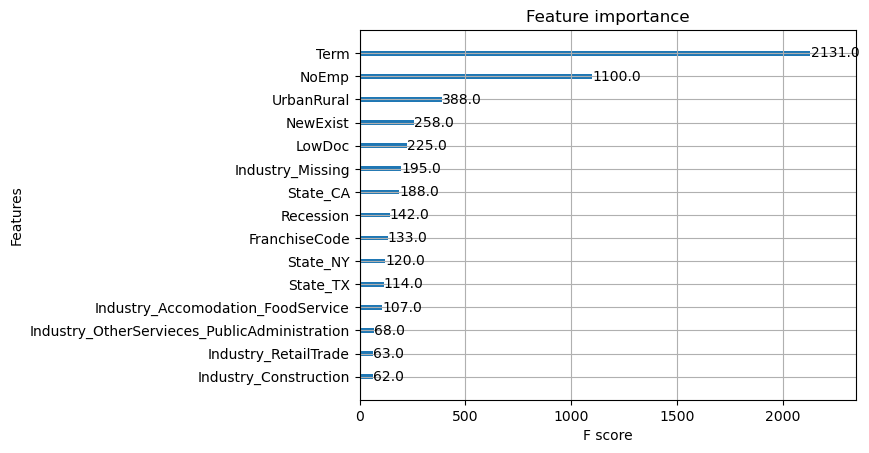

In [147]:
from xgboost import plot_importance
plot_importance(xgb_model, max_num_features=15) # top 15 most important features
plt.show()

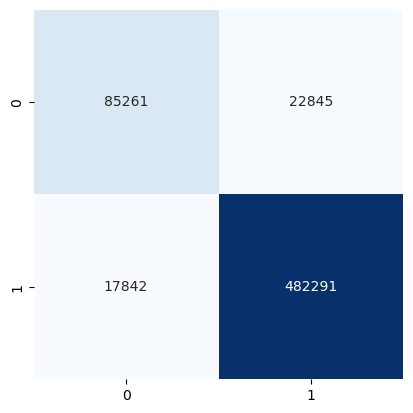

Accuracy: 0.9331
Precision: 0.9548
Recall: 0.9643
Specificity: 0.7887
F1 Score: 0.9595
True Positive: 482291
False Positive: 22845
False Negative: 17842
True Negative: 85261


In [110]:
# make predictions for train data
train_y_pred = xgb_model.predict(x_train)
train_predictions = [round(value) for value in train_y_pred]

df_train_model = pd.DataFrame({"Predicted": train_predictions,
                         "True": y_train})
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(df_train_model['True'],
                                  df_train_model['Predicted']).ravel()
# evaluate predictions
matrix_confusion = confusion_matrix(y_train, train_predictions)
sns.heatmap(matrix_confusion, square=True, annot=True,
            cmap='Blues', fmt='d', cbar=False)
plt.show()

# Accuracy
print('Accuracy: %.4f' % accuracy_score(df_train_model['True'], df_train_model['Predicted']))

# Precision
print('Precision: %.4f' % precision_score(df_train_model['True'], df_train_model['Predicted']))

# Sensitivity / Recall
print('Recall: %.4f' % recall_score(df_train_model['True'], df_train_model['Predicted']))

# Specificity
print('Specificity: %.4f' % (tn/(tn+fp)))

# F1_Score
print('F1 Score: %.4f' % f1_score(df_train_model['True'], df_train_model['Predicted']))

# True Positive
print('True Positive: %.f' % tp)

# False Positive
print('False Positive: %.f' % fp)

# False Negative
print('False Negative: %.f' % fn)

# True Negative
print('True Negative: %.f' % tn)

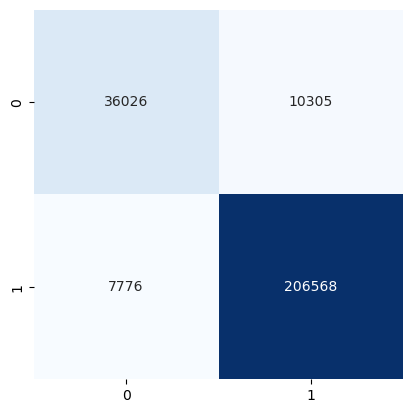

Accuracy: 0.9306
Precision: 0.9525
Recall: 0.9637
Specificity: 0.7776
F1 Score: 0.9581
True Positive: 206568
False Positive: 10305
False Negative: 7776
True Negative: 36026


In [111]:
# make predictions for test data
y_pred = xgb_model.predict(x_test)
predictions = [round(value) for value in y_pred]

df_test_model = pd.DataFrame({"Predicted": predictions,
                        "True": y_test})
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(df_test_model['True'],
                                  df_test_model['Predicted']).ravel()

# evaluate predictions
matrix_confusion = confusion_matrix(y_test, predictions)
sns.heatmap(matrix_confusion, square=True, annot=True,
            cmap='Blues', fmt='d', cbar=False)
plt.show()

# Accuracy
print('Accuracy: %.4f' % accuracy_score(df_test_model['True'], df_test_model['Predicted']))

# Precision
print('Precision: %.4f' % precision_score(df_test_model['True'], df_test_model['Predicted']))

# Sensitivity / Recall
print('Recall: %.4f' % recall_score(df_test_model['True'], df_test_model['Predicted']))

# Specificity
print('Specificity: %.4f' % (tn/(tn+fp)))

# F1_Score
print('F1 Score: %.4f' % f1_score(df_test_model['True'], df_test_model['Predicted']))

# True Positive
print('True Positive: %.f' % tp)

# False Positive
print('False Positive: %.f' % fp)

# False Negative
print('False Negative: %.f' % fn)

# True Negative
print('True Negative: %.f' % tn)

In [112]:
#with parameters
xgb_model_param = XGBClassifier(objective = "binary:logistic" , booster='gbtree', random_state=42)

In [113]:
param = {
    'eta': [0.01, 0.05, 0.1],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]}

In [114]:
random_search = RandomizedSearchCV(
    estimator=xgb_model_param,
    param_distributions=param,
    scoring = 'recall',
    n_jobs = 5,
    cv = 3,
    verbose=True
)

In [115]:
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_...
                                           min_child_weight=None, missing=nan,
                

In [116]:
random_search.best_params_

{'subsample': 1.0,
 'min_child_weight': 5,
 'max_depth': 3,
 'gamma': 1.5,
 'eta': 0.01,
 'colsample_bytree': 0.6}

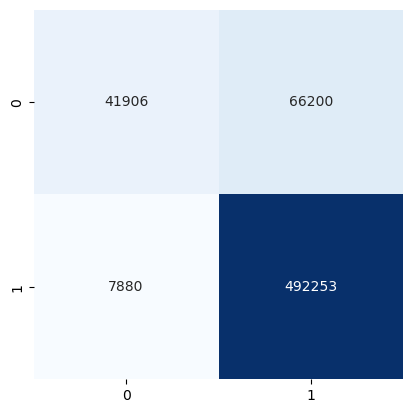

Accuracy: 0.8782
Precision: 0.8815
Recall: 0.9842
Specificity: 0.3876
F1 Score: 0.9300
True Positive: 492253
False Positive: 66200
False Negative: 7880
True Negative: 41906


In [117]:
# make predictions for train data
train_y_pred = random_search.predict(x_train)
train_predictions = [round(value) for value in train_y_pred]

df_train_model = pd.DataFrame({"Predicted": train_predictions,
                         "True": y_train})
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(df_train_model['True'],
                                  df_train_model['Predicted']).ravel()
# evaluate predictions
matrix_confusion = confusion_matrix(y_train, train_predictions)
sns.heatmap(matrix_confusion, square=True, annot=True,
            cmap='Blues', fmt='d', cbar=False)
plt.show()

# Accuracy
print('Accuracy: %.4f' % accuracy_score(df_train_model['True'], df_train_model['Predicted']))

# Precision
print('Precision: %.4f' % precision_score(df_train_model['True'], df_train_model['Predicted']))

# Sensitivity / Recall
print('Recall: %.4f' % recall_score(df_train_model['True'], df_train_model['Predicted']))

# Specificity
print('Specificity: %.4f' % (tn/(tn+fp)))

# F1_Score
print('F1 Score: %.4f' % f1_score(df_train_model['True'], df_train_model['Predicted']))

# True Positive
print('True Positive: %.f' % tp)

# False Positive
print('False Positive: %.f' % fp)

# False Negative
print('False Negative: %.f' % fn)

# True Negative
print('True Negative: %.f' % tn)

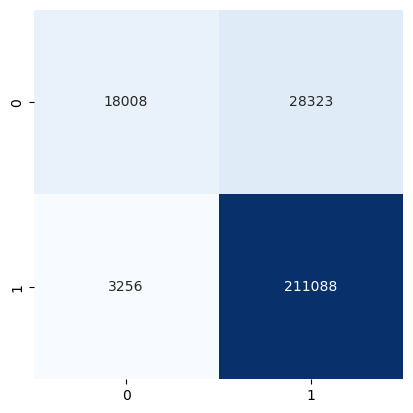

Accuracy: 0.8789
Precision: 0.8817
Recall: 0.9848
Specificity: 0.3887
F1 Score: 0.9304
True Positive: 211088
False Positive: 28323
False Negative: 3256
True Negative: 18008


In [119]:
# make predictions for test data
y_pred = random_search.predict(x_test)
predictions = [round(value) for value in y_pred]

df_test_model = pd.DataFrame({"Predicted": predictions,
                        "True": y_test})
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(df_test_model['True'],
                                  df_test_model['Predicted']).ravel()

# evaluate predictions
matrix_confusion = confusion_matrix(y_test, predictions)
sns.heatmap(matrix_confusion, square=True, annot=True,
            cmap='Blues', fmt='d', cbar=False)
plt.show()

# Accuracy
print('Accuracy: %.4f' % accuracy_score(df_test_model['True'], df_test_model['Predicted']))

# Precision
print('Precision: %.4f' % precision_score(df_test_model['True'], df_test_model['Predicted']))

# Sensitivity / Recall
print('Recall: %.4f' % recall_score(df_test_model['True'], df_test_model['Predicted']))

# Specificity
print('Specificity: %.4f' % (tn/(tn+fp)))

# F1_Score
print('F1 Score: %.4f' % f1_score(df_test_model['True'], df_test_model['Predicted']))

# True Positive
print('True Positive: %.f' % tp)

# False Positive
print('False Positive: %.f' % fp)

# False Negative
print('False Negative: %.f' % fn)

# True Negative
print('True Negative: %.f' % tn)

In [120]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

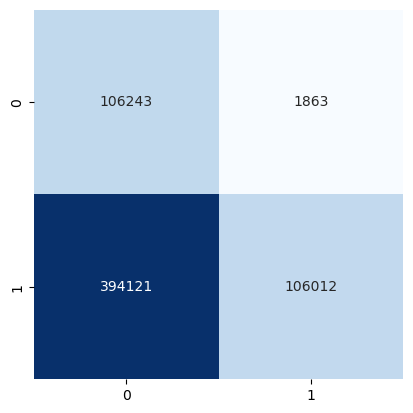

Accuracy: 0.3490
Precision: 0.9827
Recall: 0.2120
Specificity: 0.9828
F1 Score: 0.3487
True Positive: 106012
False Positive: 1863
False Negative: 394121
True Negative: 106243


In [121]:
# make predictions for train data
train_y_pred = nb_model.predict(x_train)
train_predictions = [round(value) for value in train_y_pred]

df_train_model = pd.DataFrame({"Predicted": train_predictions,
                         "True": y_train})
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(df_train_model['True'],
                                  df_train_model['Predicted']).ravel()
# evaluate predictions
matrix_confusion = confusion_matrix(y_train, train_predictions)
sns.heatmap(matrix_confusion, square=True, annot=True,
            cmap='Blues', fmt='d', cbar=False)
plt.show()

# Accuracy
print('Accuracy: %.4f' % accuracy_score(df_train_model['True'], df_train_model['Predicted']))

# Precision
print('Precision: %.4f' % precision_score(df_train_model['True'], df_train_model['Predicted']))

# Sensitivity / Recall
print('Recall: %.4f' % recall_score(df_train_model['True'], df_train_model['Predicted']))

# Specificity
print('Specificity: %.4f' % (tn/(tn+fp)))

# F1_Score
print('F1 Score: %.4f' % f1_score(df_train_model['True'], df_train_model['Predicted']))

# True Positive
print('True Positive: %.f' % tp)

# False Positive
print('False Positive: %.f' % fp)

# False Negative
print('False Negative: %.f' % fn)

# True Negative
print('True Negative: %.f' % tn)

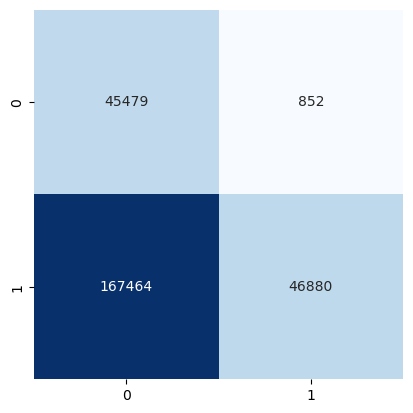

Accuracy: 0.3543
Precision: 0.9822
Recall: 0.2187
Specificity: 0.9816
F1 Score: 0.3578
True Positive: 46880
False Positive: 852
False Negative: 167464
True Negative: 45479


In [122]:
# make predictions for test data
y_pred = nb_model.predict(x_test)
predictions = [round(value) for value in y_pred]

df_test_model = pd.DataFrame({"Predicted": predictions,
                        "True": y_test})
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(df_test_model['True'],
                                  df_test_model['Predicted']).ravel()

# evaluate predictions
matrix_confusion = confusion_matrix(y_test, predictions)
sns.heatmap(matrix_confusion, square=True, annot=True,
            cmap='Blues', fmt='d', cbar=False)
plt.show()

# Accuracy
print('Accuracy: %.4f' % accuracy_score(df_test_model['True'], df_test_model['Predicted']))

# Precision
print('Precision: %.4f' % precision_score(df_test_model['True'], df_test_model['Predicted']))

# Sensitivity / Recall
print('Recall: %.4f' % recall_score(df_test_model['True'], df_test_model['Predicted']))

# Specificity
print('Specificity: %.4f' % (tn/(tn+fp)))

# F1_Score
print('F1 Score: %.4f' % f1_score(df_test_model['True'], df_test_model['Predicted']))

# True Positive
print('True Positive: %.f' % tp)

# False Positive
print('False Positive: %.f' % fp)

# False Negative
print('False Negative: %.f' % fn)

# True Negative
print('True Negative: %.f' % tn)